# Predicting acceptance of personal loan by customers using Logistic regression and Neural network

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
raw_df = pd.read_excel('bank.xlsx')

In [30]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 5000 non-null   int64
 1   Age                5000 non-null   int64
 2   Income             5000 non-null   int64
 3   ZIPCode            5000 non-null   int64
 4   Family             5000 non-null   int64
 5   Education          5000 non-null   int64
 6   Mortgage           5000 non-null   int64
 7   PersonalLoan       5000 non-null   int64
 8   SecuritiesAccount  5000 non-null   int64
 9   CDAccount          5000 non-null   int64
 10  Online             5000 non-null   int64
 11  CreditCard         5000 non-null   int64
dtypes: int64(12)
memory usage: 468.9 KB


In [31]:
raw_df.head()

,ID,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,49,91107,4,1,0,0,1,0,0,0
1,3,39,11,94720,1,1,0,0,0,0,0,0
2,4,35,100,94112,1,2,0,0,0,0,0,0
3,6,37,29,92121,4,2,155,0,0,0,1,0
4,7,53,72,91711,2,2,0,0,0,0,1,0


In [32]:
raw_df

,ID,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,49,91107,4,1,0,0,1,0,0,0
1,3,39,11,94720,1,1,0,0,0,0,0,0
2,4,35,100,94112,1,2,0,0,0,0,0,0
3,6,37,29,92121,4,2,155,0,0,0,1,0
4,7,53,72,91711,2,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4981,29,135,95762,3,1,0,1,0,1,1,1
4996,4984,51,72,95370,1,1,0,0,0,0,0,0
4997,4990,24,38,93555,1,3,0,0,0,0,1,0
4998,4995,64,75,94588,3,3,0,0,0,0,1,0


In [33]:
## Identify the Class label or Y variable
Y = raw_df.PersonalLoan.astype('category')
print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: PersonalLoan
Non-Null Count  Dtype   
--------------  -----   
5000 non-null   category
dtypes: category(1)
memory usage: 5.1 KB
None


In [34]:
raw_df.PersonalLoan

0       0
1       0
2       0
3       0
4       0
       ..
4995    1
4996    0
4997    0
4998    0
4999    0
Name: PersonalLoan, Length: 5000, dtype: int64

#### Removed ID and ZIPCode since taking then into account doesn't makes any sense for model 

In [35]:
## Select the Predictor Variables into list called X_features
X_features = list(raw_df.columns)
# risk is the outcome or Y variable in this step , we are identifying the X variables
X_features.remove('ID')
X_features.remove('ZIPCode')
X_features.remove('PersonalLoan')

In [36]:
print(X_features)

['Age', 'Income', 'Family', 'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']


In [37]:
## Set up a dataframe with only X-variables
X = raw_df[X_features]

In [38]:
X

,Age,Income,Family,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,4,1,0,1,0,0,0
1,39,11,1,1,0,0,0,0,0
2,35,100,1,2,0,0,0,0,0
3,37,29,4,2,155,0,0,1,0
4,53,72,2,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
4995,29,135,3,1,0,0,1,1,1
4996,51,72,1,1,0,0,0,0,0
4997,24,38,1,3,0,0,0,1,0
4998,64,75,3,3,0,0,0,1,0


In [39]:
## Split the Data into Training nd Test
## test size=0.3 indictaes 70% training and
## 30% test data

X_train, X_test, y_train, y_test = train_test_split(X,
                                            Y,
                                            test_size = 0.3,
                                            random_state = 500)
print(y_train.info())
## All data processing should be done after split to prevent leakage

<class 'pandas.core.series.Series'>
Index: 3500 entries, 294 to 951
Series name: PersonalLoan
Non-Null Count  Dtype   
--------------  -----   
3500 non-null   category
dtypes: category(1)
memory usage: 30.9 KB
None


In [40]:
X_train

,Age,Income,Family,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
294,43,153,2,1,0,0,0,1,0
1118,57,82,2,1,83,0,0,0,1
2461,56,90,2,3,0,0,0,0,0
353,52,31,4,1,141,0,0,1,1
704,50,15,2,2,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3005,47,199,2,1,0,0,0,1,0
3790,50,21,1,1,0,0,0,1,0
273,54,78,4,2,0,0,0,1,0
3905,34,41,1,1,0,0,0,1,0


In [41]:
## Pre-process X-vars
## 1. Identify and dummy code (one-hot encoding) the categorical column
# List of categorical columns
categorical_columns = ['Family','Education','SecuritiesAccount','CDAccount','Online','CreditCard']
X_train_encoded = pd.get_dummies(X_train,columns = categorical_columns, drop_first = True, dtype=int)
X_test_encoded = pd.get_dummies(X_test,columns = categorical_columns, drop_first = True, dtype=int)

In [42]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 294 to 951
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  3500 non-null   int64
 1   Income               3500 non-null   int64
 2   Mortgage             3500 non-null   int64
 3   Family_2             3500 non-null   int32
 4   Family_3             3500 non-null   int32
 5   Family_4             3500 non-null   int32
 6   Education_2          3500 non-null   int32
 7   Education_3          3500 non-null   int32
 8   SecuritiesAccount_1  3500 non-null   int32
 9   CDAccount_1          3500 non-null   int32
 10  Online_1             3500 non-null   int32
 11  CreditCard_1         3500 non-null   int32
dtypes: int32(9), int64(3)
memory usage: 232.4 KB


In [43]:
X_train_encoded.head()

,Age,Income,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,SecuritiesAccount_1,CDAccount_1,Online_1,CreditCard_1
294,43,153,0,1,0,0,0,0,0,0,1,0
1118,57,82,83,1,0,0,0,0,0,0,0,1
2461,56,90,0,1,0,0,0,1,0,0,0,0
353,52,31,141,0,0,1,0,0,0,0,1,1
704,50,15,101,1,0,0,1,0,0,0,0,0


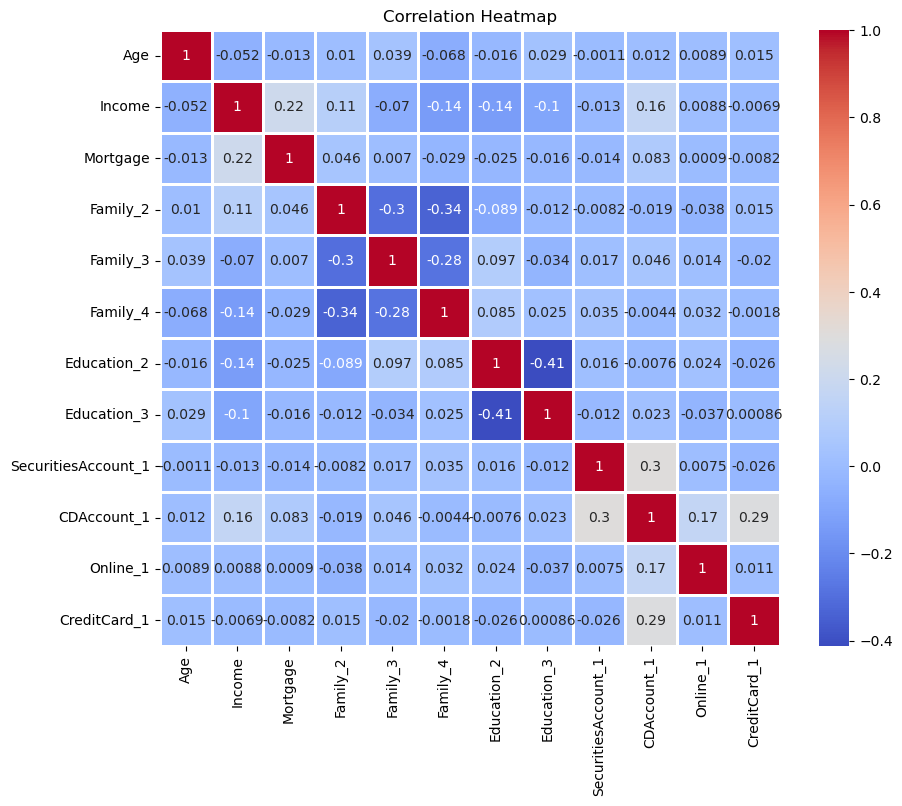

In [44]:
## 2. Identify and remove highly correlated columns

corr_matrix = X_train_encoded.corr(numeric_only = True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth = 0.8)
plt.title('Correlation Heatmap')
plt.show()

In [45]:
corr_matrix

,Age,Income,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,SecuritiesAccount_1,CDAccount_1,Online_1,CreditCard_1
Age,1.000000,-0.052295,-0.012691,0.010494,0.038561,-0.068109,-0.016479,0.028996,-0.001052,0.012290,0.008944,0.015288
Income,-0.052295,1.000000,0.215210,0.112724,-0.069952,-0.137015,-0.135392,-0.100828,-0.012764,0.162467,0.008765,-0.006852
Mortgage,-0.012691,0.215210,1.000000,0.045651,0.007038,-0.029438,-0.024895,-0.015982,-0.013972,0.082657,0.000896,-0.008228
Family_2,0.010494,0.112724,0.045651,1.000000,-0.298749,-0.337907,-0.088672,-0.011624,-0.008187,-0.019316,-0.037690,0.014701
Family_3,0.038561,-0.069952,0.007038,-0.298749,1.000000,-0.282264,0.097390,-0.033746,0.016711,0.046024,0.013715,-0.020082
Family_4,-0.068109,-0.137015,-0.029438,-0.337907,-0.282264,1.000000,0.085491,0.025378,0.034873,-0.004443,0.032083,-0.001784
Education_2,-0.016479,-0.135392,-0.024895,-0.088672,0.097390,0.085491,1.000000,-0.412484,0.016075,-0.007557,0.024279,-0.026451
Education_3,0.028996,-0.100828,-0.015982,-0.011624,-0.033746,0.025378,-0.412484,1.000000,-0.012340,0.022837,-0.037197,0.000864
SecuritiesAccount_1,-0.001052,-0.012764,-0.013972,-0.008187,0.016711,0.034873,0.016075,-0.012340,1.000000,0.303663,0.007483,-0.025719
CDAccount_1,0.012290,0.162467,0.082657,-0.019316,0.046024,-0.004443,-0.007557,0.022837,0.303663,1.000000,0.166254,0.287796


In [46]:
## Build the logit model
import statsmodels.api as sm
## Constant is to be added when using the sm library
X_train_encoded = sm.add_constant (X_train_encoded)
# Call logistic regression with X and Y variables of the training data
# Model is built with the taining data
logit = sm.Logit(y_train, X_train_encoded)
## Fir the model and display results
logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.108536
         Iterations 10
                            Results: Logit
Model:                 Logit             Method:            MLE        
Dependent Variable:    PersonalLoan      Pseudo R-squared:  0.648      
Date:                  2025-01-28 14:59  AIC:               785.7539   
No. Observations:      3500              BIC:               865.8406   
Df Model:              12                Log-Likelihood:    -379.88    
Df Residuals:          3487              LL-Null:           -1079.6    
Converged:             1.0000            LLR p-value:       1.8958e-292
No. Iterations:        10.0000           Scale:             1.0000     
-----------------------------------------------------------------------
                     Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------
const               -13.1942   0.8145 -16.1993 0.0000 -14.7905

##### Seleting only those attributes which are having p value less than 0.05

In [47]:
#Only significant X-vars are used to build the predictive model
#All variables are significant
# Removing HourlyRate, NumCompaniesWorked, PercentSalaryHike,Department_Research & Development,
# Department_Sales and Gender_Male as they are not statistically significant for the model 
significant_vars = ['const','Income','Family_3','Family_4','Education_2','Education_3','CDAccount_1','Online_1','CreditCard_1']
print(significant_vars)

['const', 'Income', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'CDAccount_1', 'Online_1', 'CreditCard_1']


In [48]:
##-------------------------------------------------------
##  Revise model to include only significant predictors
##-------------------------------------------------------
#final_logit holds the logistic regression equation aka -the model
#Only significant X-vars are used to build the predictive model
final_logit_model = sm.Logit( y_train,X_train_encoded[significant_vars] ).fit()
print(final_logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.109421
         Iterations 10
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: PersonalLoan     Pseudo R-squared: 0.645      
Date:               2025-01-28 14:59 AIC:              783.9453   
No. Observations:   3500             BIC:              839.3899   
Df Model:           8                Log-Likelihood:   -382.97    
Df Residuals:       3491             LL-Null:          -1079.6    
Converged:          1.0000           LLR p-value:      1.6843e-295
No. Iterations:     10.0000          Scale:            1.0000     
------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------
const          -13.0166   0.6840 -19.0291 0.0000 -14.3572 -11.6759
Income           0.0686   0.0038  18.2991 0.0000   0

In [49]:
##----------------------------
##  Apply model on test data
##----------------------------
X_test_encoded=sm.add_constant(X_test_encoded)
#Make sure only the significant variables in the test data are selected
X_test_sig_vars=X_test_encoded[significant_vars]
X_test_sig_vars
y_prob=final_logit_model.predict(X_test_sig_vars)
#y_prob holds the probability values for each record in the test data

In [50]:
y_prob

2187    0.008102
116     0.000257
4973    0.984199
834     0.582784
1370    0.000166
          ...   
4862    0.014924
4071    0.016224
692     0.000894
4573    0.000519
1800    0.003887
Length: 1500, dtype: float64

In [51]:
y_pred_df = pd.DataFrame({"actual_Y":y_test,
                          "predicted_prob":y_prob})


In [70]:
print(y_pred_df.head())

     actual_Y  predicted_prob
2187        0        0.008102
116         0        0.000257
4973        1        0.984199
834         1        0.582784
1370        0        0.000166


## Model With Threshold: 0.5 Default

In [52]:
threshold = 0.5
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
    lambda x: 1 if x>=threshold else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
2187        0        0.008102            0
116         0        0.000257            0
4973        1        0.984199            1
834         1        0.582784            1
1370        0        0.000166            0


In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[1329   15]
 [  53  103]]


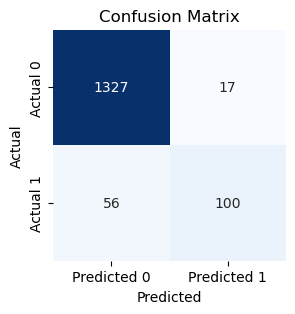

In [45]:
plt.figure(figsize= (3,3))
sns.heatmap(cm,annot = True, fmt = 'd', cmap = 'Blues', cbar =False,
            xticklabels = ['Predicted 0', 'Predicted 1'],
            yticklabels = ['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()            

In [73]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

print(f"Sensitivity (Recall):{sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity (Recall):0.66
Accuracy: 0.95
Specificity: 0.99


In [74]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1344
           1       0.87      0.66      0.75       156

    accuracy                           0.95      1500
   macro avg       0.92      0.82      0.86      1500
weighted avg       0.95      0.95      0.95      1500



## Model With Threshold: 0.1

In [95]:
threshold = 0.1
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
    lambda x: 1 if x>=threshold else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
2187        0        0.008102            0
116         0        0.000257            0
4973        1        0.984199            1
834         1        0.582784            1
1370        0        0.000166            0


In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[1242  102]
 [  26  130]]


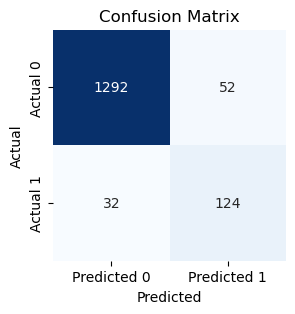

In [93]:
plt.figure(figsize= (3,3))
sns.heatmap(cm,annot = True, fmt = 'd', cmap = 'Blues', cbar =False,
            xticklabels = ['Predicted 0', 'Predicted 1'],
            yticklabels = ['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()            

In [97]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

print(f"Sensitivity (Recall):{sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity (Recall):0.83
Accuracy: 0.91
Specificity: 0.92


In [98]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1344
           1       0.56      0.83      0.67       156

    accuracy                           0.91      1500
   macro avg       0.77      0.88      0.81      1500
weighted avg       0.94      0.91      0.92      1500



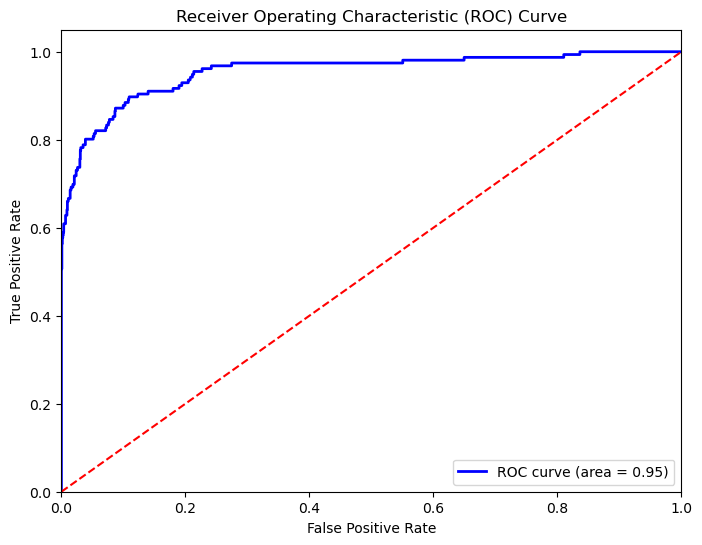

In [99]:
# Plot ROC curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [100]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def compute_sensitivity_table(y_actual, y_prob, specific_thresholds=np.arange(0.1, 0.5, 0.01)):
    """
    This function computes and prints a table of sensitivity (TPR) values for specified thresholds (0.1 to 0.5).
    
    Parameters:
    y_actual: array-like
        The actual binary labels.
    y_prob: array-like
        The predicted probabilities for the positive class.
    specific_thresholds: array-like, optional
        The specific thresholds for which to compute sensitivity. Default is np.arange(0.1, 0.5, 0.01).
    """
    
    results = []  # List to store results for the table

    for threshold in specific_thresholds:
        # Convert predicted probabilities to binary predictions based on the threshold
        y_pred = (y_prob >= threshold).astype(int)
        
        # Get the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
        
        # Calculate TPR (Sensitivity)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero
        
        # Append results
        results.append({'Threshold': threshold, 'Sensitivity (TPR)': tpr})

    # Create a DataFrame for better formatting
    sensitivity_table = pd.DataFrame(results)
    
    # Print the sensitivity table
    print(sensitivity_table)


In [101]:
compute_sensitivity_table(y_pred_df["actual_Y"],y_pred_df['predicted_prob'])

    Threshold  Sensitivity (TPR)
0        0.10           0.833333
1        0.11           0.826923
2        0.12           0.820513
3        0.13           0.820513
4        0.14           0.814103
5        0.15           0.801282
6        0.16           0.801282
7        0.17           0.801282
8        0.18           0.801282
9        0.19           0.801282
10       0.20           0.794872
11       0.21           0.788462
12       0.22           0.788462
13       0.23           0.782051
14       0.24           0.775641
15       0.25           0.775641
16       0.26           0.775641
17       0.27           0.756410
18       0.28           0.743590
19       0.29           0.737179
20       0.30           0.737179
21       0.31           0.737179
22       0.32           0.737179
23       0.33           0.730769
24       0.34           0.724359
25       0.35           0.717949
26       0.36           0.717949
27       0.37           0.717949
28       0.38           0.717949
29       0

# With Neural network model

In [102]:
import pandas as pd
raw_df=pd.read_excel('bank.xlsx')

In [103]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 5000 non-null   int64
 1   Age                5000 non-null   int64
 2   Income             5000 non-null   int64
 3   ZIPCode            5000 non-null   int64
 4   Family             5000 non-null   int64
 5   Education          5000 non-null   int64
 6   Mortgage           5000 non-null   int64
 7   PersonalLoan       5000 non-null   int64
 8   SecuritiesAccount  5000 non-null   int64
 9   CDAccount          5000 non-null   int64
 10  Online             5000 non-null   int64
 11  CreditCard         5000 non-null   int64
dtypes: int64(12)
memory usage: 468.9 KB


In [104]:
raw_df.head()

,ID,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,49,91107,4,1,0,0,1,0,0,0
1,3,39,11,94720,1,1,0,0,0,0,0,0
2,4,35,100,94112,1,2,0,0,0,0,0,0
3,6,37,29,92121,4,2,155,0,0,0,1,0
4,7,53,72,91711,2,2,0,0,0,0,1,0


In [105]:
raw_df

,ID,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,49,91107,4,1,0,0,1,0,0,0
1,3,39,11,94720,1,1,0,0,0,0,0,0
2,4,35,100,94112,1,2,0,0,0,0,0,0
3,6,37,29,92121,4,2,155,0,0,0,1,0
4,7,53,72,91711,2,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4981,29,135,95762,3,1,0,1,0,1,1,1
4996,4984,51,72,95370,1,1,0,0,0,0,0,0
4997,4990,24,38,93555,1,3,0,0,0,0,1,0
4998,4995,64,75,94588,3,3,0,0,0,0,1,0


In [106]:
##-----------------------------
## Select the Predictor Variables into list called X_features
##------------------------------
X_features = list(raw_df.columns)
# risk is the outcome or Y variable in this step , we are identifying the X variables
X_features.remove('ID')
X_features.remove('ZIPCode')
X_features.remove('PersonalLoan')

In [107]:
print(X_features)

['Age', 'Income', 'Family', 'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']


In [108]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]


In [109]:
##------------------------------------------
##  Identify the Class Label or Y variable
##------------------------------------------
Y = raw_df.PersonalLoan.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: PersonalLoan
Non-Null Count  Dtype   
--------------  -----   
5000 non-null   category
dtypes: category(1)
memory usage: 5.1 KB
None


In [110]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 3500 entries, 294 to 951
Series name: PersonalLoan
Non-Null Count  Dtype   
--------------  -----   
3500 non-null   category
dtypes: category(1)
memory usage: 30.9 KB
None


In [111]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['Family','Education','SecuritiesAccount','CDAccount','Online','CreditCard']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)

In [112]:
##-----------------------------------------------------------------------
##  2. Normalise the cont. columns
##-----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
continuous_columns= ['Age','Income','Mortgage']
scaler_min_max = MinMaxScaler()
X_train_encoded[continuous_columns] = scaler_min_max.fit_transform(X_train_encoded[continuous_columns])
X_test_encoded[continuous_columns] = scaler_min_max.fit_transform(X_test_encoded[continuous_columns])

In [113]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 294 to 951
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3500 non-null   float64
 1   Income               3500 non-null   float64
 2   Mortgage             3500 non-null   float64
 3   Family_2             3500 non-null   int64  
 4   Family_3             3500 non-null   int64  
 5   Family_4             3500 non-null   int64  
 6   Education_2          3500 non-null   int64  
 7   Education_3          3500 non-null   int64  
 8   SecuritiesAccount_1  3500 non-null   int64  
 9   CDAccount_1          3500 non-null   int64  
 10  Online_1             3500 non-null   int64  
 11  CreditCard_1         3500 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 355.5 KB


In [114]:
X_train_encoded.head()

,Age,Income,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,SecuritiesAccount_1,CDAccount_1,Online_1,CreditCard_1
294,0.454545,0.671296,0.000000,1,0,0,0,0,0,0,1,0
1118,0.772727,0.342593,0.130709,1,0,0,0,0,0,0,0,1
2461,0.750000,0.379630,0.000000,1,0,0,0,1,0,0,0,0
353,0.659091,0.106481,0.222047,0,0,1,0,0,0,0,1,1
704,0.613636,0.032407,0.159055,1,0,0,1,0,0,0,0,0


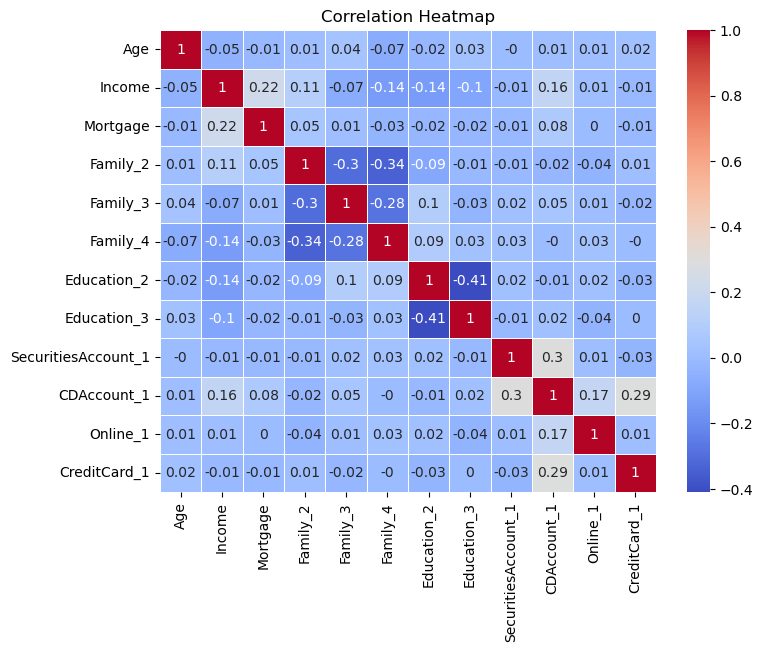

In [115]:
##-----------------------------------------------------------------------
##  3. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [116]:
corr_matrix

,Age,Income,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,SecuritiesAccount_1,CDAccount_1,Online_1,CreditCard_1
Age,1.000000,-0.052295,-0.012691,0.010494,0.038561,-0.068109,-0.016479,0.028996,-0.001052,0.012290,0.008944,0.015288
Income,-0.052295,1.000000,0.215210,0.112724,-0.069952,-0.137015,-0.135392,-0.100828,-0.012764,0.162467,0.008765,-0.006852
Mortgage,-0.012691,0.215210,1.000000,0.045651,0.007038,-0.029438,-0.024895,-0.015982,-0.013972,0.082657,0.000896,-0.008228
Family_2,0.010494,0.112724,0.045651,1.000000,-0.298749,-0.337907,-0.088672,-0.011624,-0.008187,-0.019316,-0.037690,0.014701
Family_3,0.038561,-0.069952,0.007038,-0.298749,1.000000,-0.282264,0.097390,-0.033746,0.016711,0.046024,0.013715,-0.020082
Family_4,-0.068109,-0.137015,-0.029438,-0.337907,-0.282264,1.000000,0.085491,0.025378,0.034873,-0.004443,0.032083,-0.001784
Education_2,-0.016479,-0.135392,-0.024895,-0.088672,0.097390,0.085491,1.000000,-0.412484,0.016075,-0.007557,0.024279,-0.026451
Education_3,0.028996,-0.100828,-0.015982,-0.011624,-0.033746,0.025378,-0.412484,1.000000,-0.012340,0.022837,-0.037197,0.000864
SecuritiesAccount_1,-0.001052,-0.012764,-0.013972,-0.008187,0.016711,0.034873,0.016075,-0.012340,1.000000,0.303663,0.007483,-0.025719
CDAccount_1,0.012290,0.162467,0.082657,-0.019316,0.046024,-0.004443,-0.007557,0.022837,0.303663,1.000000,0.166254,0.287796


### None are highly corelated 

In [139]:
from sklearn.neural_network import MLPClassifier
# nn_model = MLPClassifier(random_state=42)
# nn_model = MLPClassifier(random_state=42, verbose=True)
nn_model = MLPClassifier(random_state=42, verbose=True, max_iter=1500, early_stopping=True,hidden_layer_sizes=(9,), learning_rate_init=0.3)

In [140]:
print("Hyperparameters of the MLPClassifier:\n",nn_model.get_params() )

Hyperparameters of the MLPClassifier:
 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (9,), 'learning_rate': 'constant', 'learning_rate_init': 0.3, 'max_fun': 15000, 'max_iter': 1500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}


In [141]:
##-------------------------------------------------------
##  Train NN model on training data
##-------------------------------------------------------
nn_model.fit(X_train_encoded, y_train)

Iteration 1, loss = 0.35084548
Validation score: 0.908571
Iteration 2, loss = 0.21310440
Validation score: 0.908571
Iteration 3, loss = 0.17635913
Validation score: 0.957143
Iteration 4, loss = 0.16145510
Validation score: 0.954286
Iteration 5, loss = 0.16195396
Validation score: 0.931429
Iteration 6, loss = 0.16104187
Validation score: 0.960000
Iteration 7, loss = 0.13937027
Validation score: 0.957143
Iteration 8, loss = 0.11993312
Validation score: 0.971429
Iteration 9, loss = 0.11367919
Validation score: 0.965714
Iteration 10, loss = 0.10200525
Validation score: 0.977143
Iteration 11, loss = 0.08291749
Validation score: 0.985714
Iteration 12, loss = 0.07213234
Validation score: 0.980000
Iteration 13, loss = 0.07060735
Validation score: 0.985714
Iteration 14, loss = 0.06835371
Validation score: 0.980000
Iteration 15, loss = 0.06520428
Validation score: 0.980000
Iteration 16, loss = 0.07001672
Validation score: 0.980000
Iteration 17, loss = 0.07255993
Validation score: 0.982857
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(9,),
              learning_rate_init=0.3, max_iter=1500, random_state=42,
              verbose=True)

In [142]:
##----------------------------
##  Apply model on test data
##----------------------------
y_prob=nn_model.predict_proba(X_test_encoded)[:,1] # probabilities
#y_prob holds the probability values for each record in the test data

In [143]:
y_prob

array([6.41471231e-03, 2.48610029e-04, 9.52696899e-01, ...,
       1.47442177e-04, 1.79041780e-03, 1.40633267e-03])

In [144]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})
print(y_pred_df.head())

     actual_Y  predicted_prob
2187        0        0.006415
116         0        0.000249
4973        1        0.952697
834         1        0.487958
1370        0        0.000076


In [145]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
2187        0        0.006415            0
116         0        0.000249            0
4973        1        0.952697            1
834         1        0.487958            0
1370        0        0.000076            0


In [146]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[1335    9]
 [  29  127]]


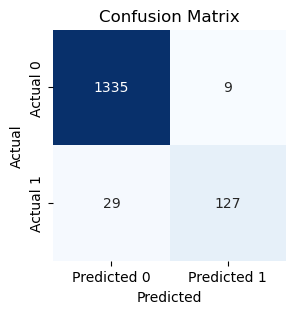

In [147]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [148]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
# specificity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.81
Specificity: 0.99
Accuracy: 0.97


In [149]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1344
           1       0.93      0.81      0.87       156

    accuracy                           0.97      1500
   macro avg       0.96      0.90      0.93      1500
weighted avg       0.97      0.97      0.97      1500



### Implications/Reccomendations
<strong> M1:</strong> 
<strong> Threshold Used:</strong> 0.5

<strong>Model performance:</strong>
* Sensitivity (Recall):66%
* Accuracy: 95%
* Specificity: 99%


Model is using below parameters for making prediction regarding attrition:
* Income
* Family
* Education
* CD account
* Online 
* Credit card


### Updated Threshold: 

<strong>M2</strong>
<strong> Threshold Used:</strong> 0.1

<strong>Model performance:</strong>
* 91% Accuracy
* 83% Sensitivity
* 92% Specificity

Model is using below parameters for making prediction regarding attrition:
* Age
* Income
* Family
* Education
* CD account
* Online 
* Credit card

### Neural Netwrok Model
<strong>Model Performance</strong>
* 97% Accuracy
* 81% Senstivity
* 99% Specificity

<strong>Result:</strong> Logit with threshold of o.1 gives good results, as for NN model as well. But overall NN model gives better results hence sticking with NN model to predict whether the customer would take a personal loan or not.
